In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np
import seaborn as sns;sns.set() #是否用到

In [4]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs   #是否用到

In [3]:
!pip install pulp

#  Data preparation

## read csv doc

In [5]:
#Load csv file 
df = pd.read_csv('orders_regions.csv')

In [6]:
df.head()

,fr_orig,dms_orig,dms_dest,fr_dest,dms_mode,trade_type,tons_2012,tons_2013,tons_2014,tons_2015,...,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
0,NaN,41,41,NaN,1,1,9.4271,8.0744,8.5333,8.7350,...,26.3959,22.6083,23.8934,24.4580,24.5794,24.1671,23.9867,23.4553,23.0211,23.7070
1,NaN,41,42,NaN,1,1,10.8730,9.4939,10.0537,10.2454,...,30.4444,26.5829,28.1502,28.6871,31.4683,33.6674,37.2330,39.2266,41.9147,45.5499
2,NaN,41,61,NaN,1,1,117.3168,106.7540,113.0699,107.2314,...,351.0104,319.4067,338.3039,320.8349,362.6319,399.1541,426.9936,451.3735,474.0091,509.4556
3,NaN,41,69,NaN,1,1,47.9217,41.9075,42.7999,38.5380,...,98.5453,86.1778,88.0130,79.2487,78.9657,78.6754,77.6467,78.1334,78.7642,81.9460
4,NaN,42,41,NaN,1,1,4.5427,4.0461,4.4045,4.5846,...,12.7196,11.3291,12.3327,12.8370,13.4729,13.7776,13.8346,13.8059,13.6660,14.2980


## select the domestic data

In [7]:
df_domestic_data = pd.DataFrame #可删除
df_domestic_data = df[(df['trade_type'] == 1)]


In [8]:
df_domestic_data.head()

,fr_orig,dms_orig,dms_dest,fr_dest,dms_mode,trade_type,tons_2012,tons_2013,tons_2014,tons_2015,...,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
0,NaN,41,41,NaN,1,1,9.4271,8.0744,8.5333,8.7350,...,26.3959,22.6083,23.8934,24.4580,24.5794,24.1671,23.9867,23.4553,23.0211,23.7070
1,NaN,41,42,NaN,1,1,10.8730,9.4939,10.0537,10.2454,...,30.4444,26.5829,28.1502,28.6871,31.4683,33.6674,37.2330,39.2266,41.9147,45.5499
2,NaN,41,61,NaN,1,1,117.3168,106.7540,113.0699,107.2314,...,351.0104,319.4067,338.3039,320.8349,362.6319,399.1541,426.9936,451.3735,474.0091,509.4556
3,NaN,41,69,NaN,1,1,47.9217,41.9075,42.7999,38.5380,...,98.5453,86.1778,88.0130,79.2487,78.9657,78.6754,77.6467,78.1334,78.7642,81.9460
4,NaN,42,41,NaN,1,1,4.5427,4.0461,4.4045,4.5846,...,12.7196,11.3291,12.3327,12.8370,13.4729,13.7776,13.8346,13.8059,13.6660,14.2980


In [9]:
# deleting foreign data since we only analyse domesitic data
del df_domestic_data['fr_orig']
del df_domestic_data['fr_dest']


In [10]:
df_domestic_data.head()

,dms_orig,dms_dest,dms_mode,trade_type,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,...,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
0,41,41,1,1,9.4271,8.0744,8.5333,8.7350,8.7784,8.6311,...,26.3959,22.6083,23.8934,24.4580,24.5794,24.1671,23.9867,23.4553,23.0211,23.7070
1,41,42,1,1,10.8730,9.4939,10.0537,10.2454,11.2387,12.0241,...,30.4444,26.5829,28.1502,28.6871,31.4683,33.6674,37.2330,39.2266,41.9147,45.5499
2,41,61,1,1,117.3168,106.7540,113.0699,107.2314,121.2010,133.4077,...,351.0104,319.4067,338.3039,320.8349,362.6319,399.1541,426.9936,451.3735,474.0091,509.4556
3,41,69,1,1,47.9217,41.9075,42.7999,38.5380,38.4003,38.2591,...,98.5453,86.1778,88.0130,79.2487,78.9657,78.6754,77.6467,78.1334,78.7642,81.9460
4,42,41,1,1,4.5427,4.0461,4.4045,4.5846,4.8117,4.9205,...,12.7196,11.3291,12.3327,12.8370,13.4729,13.7776,13.8346,13.8059,13.6660,14.2980


In [11]:
df_domestic_data.shape

(14281, 24)

## selecting import and export data

In [12]:
# selecting import data
df_import_data = df_domestic_data.iloc[:,0:25]

# deleting dms_orig since it is importing data
del df_import_data['dms_orig']
df_import_data

,dms_dest,dms_mode,trade_type,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,...,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
0,41,1,1,9.4271,8.0744,8.5333,8.7350,8.7784,8.6311,8.5667,...,26.3959,22.6083,23.8934,24.4580,24.5794,24.1671,23.9867,23.4553,23.0211,23.7070
1,42,1,1,10.8730,9.4939,10.0537,10.2454,11.2387,12.0241,13.2975,...,30.4444,26.5829,28.1502,28.6871,31.4683,33.6674,37.2330,39.2266,41.9147,45.5499
2,61,1,1,117.3168,106.7540,113.0699,107.2314,121.2010,133.4077,142.7123,...,351.0104,319.4067,338.3039,320.8349,362.6319,399.1541,426.9936,451.3735,474.0091,509.4556
3,69,1,1,47.9217,41.9075,42.7999,38.5380,38.4003,38.2591,37.7589,...,98.5453,86.1778,88.0130,79.2487,78.9657,78.6754,77.6467,78.1334,78.7642,81.9460
4,41,1,1,4.5427,4.0461,4.4045,4.5846,4.8117,4.9205,4.9409,...,12.7196,11.3291,12.3327,12.8370,13.4729,13.7776,13.8346,13.8059,13.6660,14.2980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64038,419,5,1,0.1101,0.1070,0.1163,0.1101,0.1204,0.1305,0.1408,...,0.1104,0.1073,0.1166,0.1104,0.1208,0.1309,0.1412,0.1562,0.1739,0.2036
64039,491,1,1,53.9432,52.4086,56.9737,53.9274,59.0027,63.9474,68.9952,...,177.4288,172.3813,187.3965,177.3768,194.0704,210.3345,226.9376,250.9934,279.5384,327.2653
64040,499,1,1,0.4336,0.4213,0.4580,0.4335,0.4743,0.5140,0.5546,...,9.6876,9.4120,10.2318,9.6848,10.5962,11.4842,12.3908,13.7042,15.2628,17.8687
64041,560,1,1,124.4424,120.9023,131.4334,124.4059,136.1143,147.5213,159.1662,...,318.7151,309.6483,336.6201,318.6217,348.6084,377.8236,407.6477,450.8591,502.1345,587.8662


In [13]:
# selecting export data
df_export_data = df_domestic_data.iloc[:,0:25]
del df_export_data['dms_dest']
df_export_data

,dms_orig,dms_mode,trade_type,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,...,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
0,41,1,1,9.4271,8.0744,8.5333,8.7350,8.7784,8.6311,8.5667,...,26.3959,22.6083,23.8934,24.4580,24.5794,24.1671,23.9867,23.4553,23.0211,23.7070
1,41,1,1,10.8730,9.4939,10.0537,10.2454,11.2387,12.0241,13.2975,...,30.4444,26.5829,28.1502,28.6871,31.4683,33.6674,37.2330,39.2266,41.9147,45.5499
2,41,1,1,117.3168,106.7540,113.0699,107.2314,121.2010,133.4077,142.7123,...,351.0104,319.4067,338.3039,320.8349,362.6319,399.1541,426.9936,451.3735,474.0091,509.4556
3,41,1,1,47.9217,41.9075,42.7999,38.5380,38.4003,38.2591,37.7589,...,98.5453,86.1778,88.0130,79.2487,78.9657,78.6754,77.6467,78.1334,78.7642,81.9460
4,42,1,1,4.5427,4.0461,4.4045,4.5846,4.8117,4.9205,4.9409,...,12.7196,11.3291,12.3327,12.8370,13.4729,13.7776,13.8346,13.8059,13.6660,14.2980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64038,560,5,1,0.1101,0.1070,0.1163,0.1101,0.1204,0.1305,0.1408,...,0.1104,0.1073,0.1166,0.1104,0.1208,0.1309,0.1412,0.1562,0.1739,0.2036
64039,560,1,1,53.9432,52.4086,56.9737,53.9274,59.0027,63.9474,68.9952,...,177.4288,172.3813,187.3965,177.3768,194.0704,210.3345,226.9376,250.9934,279.5384,327.2653
64040,560,1,1,0.4336,0.4213,0.4580,0.4335,0.4743,0.5140,0.5546,...,9.6876,9.4120,10.2318,9.6848,10.5962,11.4842,12.3908,13.7042,15.2628,17.8687
64041,560,1,1,124.4424,120.9023,131.4334,124.4059,136.1143,147.5213,159.1662,...,318.7151,309.6483,336.6201,318.6217,348.6084,377.8236,407.6477,450.8591,502.1345,587.8662


## grouping the data and summing

In [14]:
df_import_data_group = df_import_data.groupby(df['dms_dest'])[df_import_data.columns[3:25]].sum()
df_import_data_group.head()


,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
dms_dest,,,,,,,,,,,,,,,,,,,,
41,103044.417460,101024.514433,103032.666807,105821.111170,116787.567462,121070.492501,127257.427991,132673.635511,138345.690544,144984.890971,96479.844046,96903.222496,99580.121416,102527.589364,113328.886727,123077.259121,133098.193548,143253.420902,154411.670114,167732.960848
42,27679.308099,29777.656900,28716.498405,30643.959607,32796.222416,35929.861323,37130.160231,39962.246541,43386.443053,44085.626967,17668.983831,17887.219134,18287.020045,18818.025148,20924.404168,22662.269683,24369.574902,26053.448625,27833.076452,30050.451785
49,37242.049590,36356.418094,36372.183903,36228.388907,37246.733528,37612.096343,38149.001161,38868.358082,40015.006006,42306.673738,23135.287906,23669.572454,24206.938055,24691.500501,26729.860731,28669.939404,30690.962413,32712.808147,34946.108229,37746.018787
61,394317.343485,405029.782836,421012.164542,429961.660484,482588.066832,523060.768557,558902.404843,589803.448770,617903.825484,645946.934394,491920.681353,510555.538112,528734.690955,543779.488907,601397.676797,654916.196984,708711.772380,762456.523411,815657.052494,868677.095881
62,54376.830590,53947.263799,55041.143131,55766.359409,60006.709100,62686.190889,64398.505435,65679.061806,67386.283432,70531.703292,51515.268430,51348.295931,52167.618638,53165.566413,56770.329907,59840.915095,62883.564740,65989.464471,69614.283620,75057.574413


In [15]:
df_export_data_group = df_export_data.groupby(df['dms_orig'])[df_export_data.columns[3:25]].sum()
df_export_data_group.head()


,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
dms_orig,,,,,,,,,,,,,,,,,,,,
41,81195.794500,77669.569100,80097.214700,81599.201400,88871.945400,90755.012000,95041.351700,98576.424900,102953.409100,109224.274700,83306.392800,82781.750800,84512.89670,86496.18260,95806.009600,104610.458100,114172.520800,124769.135900,136618.543000,151043.446700
42,22876.090190,24003.621538,23046.925265,24789.407765,25673.723657,28256.670432,28974.541286,31507.385437,34848.777438,35072.033918,12451.938160,12643.347710,13048.90832,13428.72549,14456.218770,15782.741580,17059.912100,18417.031780,19942.617760,21639.867680
49,47374.435100,49636.832000,50870.290100,51262.742400,58952.415400,63563.739800,67125.685300,70375.959200,72748.408100,78949.296900,17512.135600,18450.114600,18830.52860,19020.31520,21744.663600,23674.103200,25343.265900,26871.167700,28132.553500,30610.568200
61,380107.084951,389027.937925,402628.381866,413170.031263,459249.497106,491874.890819,522512.164968,549194.312465,573516.515591,598174.446210,574815.311335,596546.452406,614853.20279,633261.11360,697067.341427,752861.622466,809943.260424,866489.818222,922814.989494,983790.614792
62,52742.646400,53047.345565,53965.423719,55016.716661,59927.017683,62349.582540,63732.514190,64585.901490,66019.192370,68646.495540,59312.064900,57756.946900,58073.13320,58547.27460,62594.930000,65815.683100,69632.551900,73375.256200,77648.575300,84458.674400


In [16]:
df_import_data_group.index


Int64Index([ 41,  42,  49,  61,  62,  63,  64,  69,  81,  89, 160, 321, 329,
            350, 411, 419, 491, 499, 560],
           dtype='int64', name='dms_dest')

In [17]:
df_export_data_group.index

Int64Index([ 41,  42,  49,  61,  62,  63,  64,  69,  81,  89, 160, 321, 329,
            350, 411, 419, 491, 499, 560],
           dtype='int64', name='dms_orig')

In [18]:
#add index into dataframe
df_import_data_group['dms_dest'] = df_import_data_group.index
df_import_data_group


,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,...,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_dest
dms_dest,,,,,,,,,,,,,,,,,,,,,
41,103044.417460,101024.514433,103032.666807,105821.111170,116787.567462,121070.492501,127257.427991,132673.635511,138345.690544,144984.890971,...,96903.222496,99580.121416,102527.589364,113328.886727,123077.259121,133098.193548,143253.420902,154411.670114,167732.960848,41
42,27679.308099,29777.656900,28716.498405,30643.959607,32796.222416,35929.861323,37130.160231,39962.246541,43386.443053,44085.626967,...,17887.219134,18287.020045,18818.025148,20924.404168,22662.269683,24369.574902,26053.448625,27833.076452,30050.451785,42
49,37242.049590,36356.418094,36372.183903,36228.388907,37246.733528,37612.096343,38149.001161,38868.358082,40015.006006,42306.673738,...,23669.572454,24206.938055,24691.500501,26729.860731,28669.939404,30690.962413,32712.808147,34946.108229,37746.018787,49
61,394317.343485,405029.782836,421012.164542,429961.660484,482588.066832,523060.768557,558902.404843,589803.448770,617903.825484,645946.934394,...,510555.538112,528734.690955,543779.488907,601397.676797,654916.196984,708711.772380,762456.523411,815657.052494,868677.095881,61
62,54376.830590,53947.263799,55041.143131,55766.359409,60006.709100,62686.190889,64398.505435,65679.061806,67386.283432,70531.703292,...,51348.295931,52167.618638,53165.566413,56770.329907,59840.915095,62883.564740,65989.464471,69614.283620,75057.574413,62
63,46051.689720,48659.873379,49734.236189,50270.106780,53007.932938,54554.929850,56163.376569,58020.794246,59805.914407,62582.196375,...,71540.941437,73430.107123,74862.562655,81305.668214,86752.070958,92072.398608,97694.872146,103691.499618,111862.604675,63
64,178736.810300,185575.704371,192152.462912,190601.142233,205003.190846,211518.904301,215921.352046,220726.950181,225044.936786,231380.395544,...,204639.956005,209031.953046,211038.724424,226864.355980,239455.958736,251515.167861,263962.695196,277759.756180,297214.440058,64
69,186158.478470,193714.970237,199549.970170,206524.691343,222375.232094,229534.902945,235029.631668,240386.917055,246523.553644,256698.343057,...,126643.821282,130228.732784,133633.970978,142958.466198,149541.159135,155748.514109,161509.382236,168135.224319,177943.411297,69
81,112060.576500,117471.630000,118715.607400,118180.455000,129682.228000,136341.576600,146625.308600,156749.743500,157734.738200,158945.931600,...,75788.945100,77946.263000,79099.411400,86583.979500,92410.225800,98546.163800,104429.432800,110665.235300,118406.270600,81


In [19]:
df_export_data_group['dms_orig'] = df_export_data_group.index
df_export_data_group

,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,...,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_orig
dms_orig,,,,,,,,,,,,,,,,,,,,,
41,81195.794500,77669.569100,80097.214700,81599.201400,88871.945400,90755.012000,95041.351700,98576.424900,102953.409100,109224.274700,...,82781.750800,84512.896700,86496.182600,95806.009600,104610.458100,114172.520800,124769.135900,136618.543000,151043.446700,41
42,22876.090190,24003.621538,23046.925265,24789.407765,25673.723657,28256.670432,28974.541286,31507.385437,34848.777438,35072.033918,...,12643.347710,13048.908320,13428.725490,14456.218770,15782.741580,17059.912100,18417.031780,19942.617760,21639.867680,42
49,47374.435100,49636.832000,50870.290100,51262.742400,58952.415400,63563.739800,67125.685300,70375.959200,72748.408100,78949.296900,...,18450.114600,18830.528600,19020.315200,21744.663600,23674.103200,25343.265900,26871.167700,28132.553500,30610.568200,49
61,380107.084951,389027.937925,402628.381866,413170.031263,459249.497106,491874.890819,522512.164968,549194.312465,573516.515591,598174.446210,...,596546.452406,614853.202790,633261.113600,697067.341427,752861.622466,809943.260424,866489.818222,922814.989494,983790.614792,61
62,52742.646400,53047.345565,53965.423719,55016.716661,59927.017683,62349.582540,63732.514190,64585.901490,66019.192370,68646.495540,...,57756.946900,58073.133200,58547.274600,62594.930000,65815.683100,69632.551900,73375.256200,77648.575300,84458.674400,62
63,35840.665000,36104.994599,36796.057602,37233.964515,38469.644647,39245.218599,40309.741261,41763.763929,43096.127202,44861.965769,...,49463.618238,50846.819687,52416.510135,57363.589500,61698.644756,66304.988659,71359.745431,76886.129673,81860.732824,63
64,178482.924839,185982.357282,192501.916241,193266.932807,205558.131859,211381.567841,215986.735600,221117.552222,225715.578789,232944.807732,...,212190.555381,220085.244098,226014.152155,242453.402543,257277.724819,273306.498601,289909.100266,308261.984877,328810.817685,64
69,173885.589200,180544.768950,184885.362635,184807.575668,199562.650670,207754.828348,214122.883019,220052.249635,227097.147294,235933.836968,...,110160.791911,113187.822478,110965.755591,120049.425600,127623.958660,133674.776264,138783.125177,145094.235136,153527.061732,69
81,115088.868500,125007.635500,128149.337300,131041.547200,147988.954700,159012.762100,174203.840400,190001.917300,196338.508000,201990.396300,...,88498.938700,91669.519800,94404.439200,102955.443600,109627.010400,116606.827400,123289.565000,129950.643000,138720.143900,81


In [20]:
#reset the index
df_import_data_group = df_import_data_group.reset_index(drop = True)
df_export_data_group = df_export_data_group.reset_index(drop = True)


In [21]:
#make data in dms_dest match the.shp doc(add 0)
df_import_data_group['dms_dest'] = df_import_data_group['dms_dest'].apply(lambda x:str(x).zfill(3))
df_export_data_group['dms_orig'] = df_export_data_group['dms_orig'].apply(lambda x:str(x).zfill(3))

In [22]:
df_import_data_group

,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,...,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_dest
0,103044.417460,101024.514433,103032.666807,105821.111170,116787.567462,121070.492501,127257.427991,132673.635511,138345.690544,144984.890971,...,96903.222496,99580.121416,102527.589364,113328.886727,123077.259121,133098.193548,143253.420902,154411.670114,167732.960848,041
1,27679.308099,29777.656900,28716.498405,30643.959607,32796.222416,35929.861323,37130.160231,39962.246541,43386.443053,44085.626967,...,17887.219134,18287.020045,18818.025148,20924.404168,22662.269683,24369.574902,26053.448625,27833.076452,30050.451785,042
2,37242.049590,36356.418094,36372.183903,36228.388907,37246.733528,37612.096343,38149.001161,38868.358082,40015.006006,42306.673738,...,23669.572454,24206.938055,24691.500501,26729.860731,28669.939404,30690.962413,32712.808147,34946.108229,37746.018787,049
3,394317.343485,405029.782836,421012.164542,429961.660484,482588.066832,523060.768557,558902.404843,589803.448770,617903.825484,645946.934394,...,510555.538112,528734.690955,543779.488907,601397.676797,654916.196984,708711.772380,762456.523411,815657.052494,868677.095881,061
4,54376.830590,53947.263799,55041.143131,55766.359409,60006.709100,62686.190889,64398.505435,65679.061806,67386.283432,70531.703292,...,51348.295931,52167.618638,53165.566413,56770.329907,59840.915095,62883.564740,65989.464471,69614.283620,75057.574413,062
5,46051.689720,48659.873379,49734.236189,50270.106780,53007.932938,54554.929850,56163.376569,58020.794246,59805.914407,62582.196375,...,71540.941437,73430.107123,74862.562655,81305.668214,86752.070958,92072.398608,97694.872146,103691.499618,111862.604675,063
6,178736.810300,185575.704371,192152.462912,190601.142233,205003.190846,211518.904301,215921.352046,220726.950181,225044.936786,231380.395544,...,204639.956005,209031.953046,211038.724424,226864.355980,239455.958736,251515.167861,263962.695196,277759.756180,297214.440058,064
7,186158.478470,193714.970237,199549.970170,206524.691343,222375.232094,229534.902945,235029.631668,240386.917055,246523.553644,256698.343057,...,126643.821282,130228.732784,133633.970978,142958.466198,149541.159135,155748.514109,161509.382236,168135.224319,177943.411297,069
8,112060.576500,117471.630000,118715.607400,118180.455000,129682.228000,136341.576600,146625.308600,156749.743500,157734.738200,158945.931600,...,75788.945100,77946.263000,79099.411400,86583.979500,92410.225800,98546.163800,104429.432800,110665.235300,118406.270600,081
9,128374.929701,130976.079601,134560.562101,133199.870501,137782.470901,141078.266201,142986.530301,145095.152701,147223.891402,151000.115001,...,57412.374407,58512.307007,59183.521207,63020.725709,65498.000209,68258.051210,70717.275910,73502.003810,77202.831410,089


In [23]:
df_export_data_group

,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,...,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_orig
0,81195.794500,77669.569100,80097.214700,81599.201400,88871.945400,90755.012000,95041.351700,98576.424900,102953.409100,109224.274700,...,82781.750800,84512.896700,86496.182600,95806.009600,104610.458100,114172.520800,124769.135900,136618.543000,151043.446700,041
1,22876.090190,24003.621538,23046.925265,24789.407765,25673.723657,28256.670432,28974.541286,31507.385437,34848.777438,35072.033918,...,12643.347710,13048.908320,13428.725490,14456.218770,15782.741580,17059.912100,18417.031780,19942.617760,21639.867680,042
2,47374.435100,49636.832000,50870.290100,51262.742400,58952.415400,63563.739800,67125.685300,70375.959200,72748.408100,78949.296900,...,18450.114600,18830.528600,19020.315200,21744.663600,23674.103200,25343.265900,26871.167700,28132.553500,30610.568200,049
3,380107.084951,389027.937925,402628.381866,413170.031263,459249.497106,491874.890819,522512.164968,549194.312465,573516.515591,598174.446210,...,596546.452406,614853.202790,633261.113600,697067.341427,752861.622466,809943.260424,866489.818222,922814.989494,983790.614792,061
4,52742.646400,53047.345565,53965.423719,55016.716661,59927.017683,62349.582540,63732.514190,64585.901490,66019.192370,68646.495540,...,57756.946900,58073.133200,58547.274600,62594.930000,65815.683100,69632.551900,73375.256200,77648.575300,84458.674400,062
5,35840.665000,36104.994599,36796.057602,37233.964515,38469.644647,39245.218599,40309.741261,41763.763929,43096.127202,44861.965769,...,49463.618238,50846.819687,52416.510135,57363.589500,61698.644756,66304.988659,71359.745431,76886.129673,81860.732824,063
6,178482.924839,185982.357282,192501.916241,193266.932807,205558.131859,211381.567841,215986.735600,221117.552222,225715.578789,232944.807732,...,212190.555381,220085.244098,226014.152155,242453.402543,257277.724819,273306.498601,289909.100266,308261.984877,328810.817685,064
7,173885.589200,180544.768950,184885.362635,184807.575668,199562.650670,207754.828348,214122.883019,220052.249635,227097.147294,235933.836968,...,110160.791911,113187.822478,110965.755591,120049.425600,127623.958660,133674.776264,138783.125177,145094.235136,153527.061732,069
8,115088.868500,125007.635500,128149.337300,131041.547200,147988.954700,159012.762100,174203.840400,190001.917300,196338.508000,201990.396300,...,88498.938700,91669.519800,94404.439200,102955.443600,109627.010400,116606.827400,123289.565000,129950.643000,138720.143900,081
9,124660.622700,133303.794700,137351.894600,136384.884000,142836.172000,147082.652300,147267.119500,147404.279900,147943.535900,150068.278400,...,44078.169500,45476.892800,45993.938500,49663.918400,52179.775900,53829.810500,55231.939000,56714.205600,59655.809900,089


In [24]:
df_import_data_group.describe()

,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,97111.773988,100228.980997,102281.506056,103412.237918,112198.379066,117555.136348,122886.798978,127943.486017,132485.200757,137216.862466,82586.812279,84902.793807,87164.514125,89075.069262,97119.413626,103880.888613,110758.877652,117630.036756,124836.967952,133220.107246
std,85915.196105,88551.245251,92179.692407,94001.357432,105064.471960,113300.056055,120531.473894,126820.094840,132359.633024,138212.878127,108443.918458,112392.371328,116369.440148,119538.515261,131979.065316,143538.639120,155105.240736,166695.690856,178209.023057,189846.496700
min,27639.347100,29777.656900,28716.498405,30154.883700,31880.439700,32636.425800,33229.569900,33193.605600,32761.295900,32728.248600,13455.361700,13905.758100,14361.642400,14642.175600,15799.344600,16634.668600,17510.847700,18340.163800,19173.106700,20290.968200
25%,44202.137554,45486.446789,46840.180320,47801.015872,51693.119545,54110.063853,56833.036479,59464.398763,61987.547823,65239.198005,36272.764482,37026.969064,38092.183092,38927.528653,42891.496125,45909.182406,48926.327684,51932.790166,55029.517656,58054.643004
50%,70394.653860,67704.690922,69328.494409,70623.265783,75859.196988,79342.334705,83223.513275,86438.205127,89843.710905,94593.978415,51515.268430,51348.295931,52167.618638,53165.566413,56770.329907,59840.915095,62883.564740,65989.464471,69614.283620,75057.574413
75%,112752.613050,119292.797950,118362.039350,117590.417250,127268.975500,132961.434750,140026.775801,145462.431001,150489.116151,154566.225751,76038.335785,78754.283104,81025.824915,82441.627218,89909.207640,95831.653112,102050.422132,108085.139201,114351.471170,121406.394639
max,394317.343485,405029.782836,421012.164542,429961.660484,482588.066832,523060.768557,558902.404843,589803.448770,617903.825484,645946.934394,491920.681353,510555.538112,528734.690955,543779.488907,601397.676797,654916.196984,708711.772380,762456.523411,815657.052494,868677.095881


In [25]:
df_export_data_group.describe()

,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,97111.773988,100228.980997,102281.506056,103412.237918,112198.379066,117555.136348,122886.798978,127943.486017,132485.200757,137216.862466,82586.812279,84902.793807,87164.514125,89075.069262,97119.413626,103880.888613,110758.877652,117630.036756,124836.967952,133220.107246
std,83568.306363,85820.815294,88670.283927,90327.198558,99707.824188,106244.010688,112437.621026,117874.121505,122446.047195,127325.306627,127294.086972,132082.178539,136309.273120,140417.515198,154317.760759,166604.051760,179234.679550,191783.196699,204346.760385,217922.430672
min,22876.090190,24003.621538,23046.925265,24789.407765,25673.723657,27600.646379,28866.837946,31507.385437,34848.777438,35072.033918,12451.938160,12643.347710,13048.908320,13428.725490,14456.218770,15782.741580,17059.912100,18417.031780,19942.617760,21639.867680
25%,48205.699845,49135.528826,50148.639021,50757.637875,56751.063830,59910.458045,62162.106455,63908.764679,65783.705757,68077.585488,27666.018639,27824.098085,28705.338832,29023.549180,32169.681396,34193.028911,36196.332776,38155.658696,40536.680626,43324.957846
50%,66925.078700,70726.865070,71184.694966,72745.045433,78964.652728,84251.542452,88887.692510,92583.155151,95680.120129,99101.386560,43594.797000,46212.663300,45633.603400,45993.938500,49663.918400,52179.775900,53829.810500,55231.939000,57309.450700,59655.809900
75%,119874.745600,129155.715100,132750.615950,133713.215600,145412.563350,150528.424300,153513.816300,156454.146050,158741.191300,160070.127150,76609.012870,77596.331860,78949.351395,80890.239720,87939.498430,94525.463125,101652.780005,108581.816130,114287.781690,121926.020520
max,380107.084951,389027.937925,402628.381866,413170.031263,459249.497106,491874.890819,522512.164968,549194.312465,573516.515591,598174.446210,574815.311335,596546.452406,614853.202790,633261.113600,697067.341427,752861.622466,809943.260424,866489.818222,922814.989494,983790.614792


## check null value

In [26]:
df_import_data_group.isnull().any().sum()
# no null value

0

In [27]:
df_export_data_group.isnull().any().sum()
# no null value

0

## read .shp doc

In [33]:
df_map = gpd.read_file('CFS_AREA_shapefile_010215/CFS_AREA_shapefile_010215.shp')
df_map.to_crs(epsg = '4326', inplace = True)
df_map.head()

,ANSI_ST,ANSI_CNTY,ANSI_ST_CO,CNTY_NAME,CFS07_AREA,CFS12_AREA,CFS07_TYPE,CFS12_TYPE,CFS07DDGEO,CFS07GEOID,CFS12GEOID,CFS07_NAME,CFS12_NAME,geometry
0,15,001,15001,Hawaii County,99999,99999,R,R,159,E330000US1599999999,E330000US1599999999,Remainder of Hawaii,Remainder of Hawaii,"POLYGON ((-155.96347 19.08207, -155.96649 19.0..."
1,05,027,05027,Columbia County,99999,99999,R,R,050,E330000US0599999999,E330000US0599999999,Remainder of Arkansas,Remainder of Arkansas,"POLYGON ((-93.49052 33.01846, -93.49052 33.018..."
2,38,011,38011,Bowman County,99999,99999,R,R,380,E330000US3899999999,E330000US3899999999,Remainder of North Dakota,Remainder of North Dakota,"POLYGON ((-104.04579 46.11943, -104.04579 46.1..."
3,36,031,36031,Essex County,99999,99999,R,R,369,E330000US3699999999,E330000US3699999999,Remainder of New York,Remainder of New York,"POLYGON ((-73.90969 44.42970, -73.89728 44.430..."
4,35,007,35007,Colfax County,99999,99999,R,R,350,E330000US3599999999,E330000US3599999999,Remainder of New Mexico,Remainder of New Mexico,"POLYGON ((-104.88900 36.26114, -104.90147 36.2..."


## Combine the import data and the map data

In [34]:
df_import_merge = pd.merge(df_map,df_import_data_group,left_on = 'CFS07DDGEO', right_on = 'dms_dest')
df_import_merge.head()

,ANSI_ST,ANSI_CNTY,ANSI_ST_CO,CNTY_NAME,CFS07_AREA,CFS12_AREA,CFS07_TYPE,CFS12_TYPE,CFS07DDGEO,CFS07GEOID,...,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_dest
0,35,007,35007,Colfax County,99999,99999,R,R,350,E330000US3599999999,...,46453.8077,47162.3036,47970.2541,50910.1575,53066.8989,55335.2767,57822.8203,60608.7704,63318.2333,350
1,35,037,35037,Quay County,99999,99999,R,R,350,E330000US3599999999,...,46453.8077,47162.3036,47970.2541,50910.1575,53066.8989,55335.2767,57822.8203,60608.7704,63318.2333,350
2,35,059,35059,Union County,99999,99999,R,R,350,E330000US3599999999,...,46453.8077,47162.3036,47970.2541,50910.1575,53066.8989,55335.2767,57822.8203,60608.7704,63318.2333,350
3,35,035,35035,Otero County,99999,99999,R,R,350,E330000US3599999999,...,46453.8077,47162.3036,47970.2541,50910.1575,53066.8989,55335.2767,57822.8203,60608.7704,63318.2333,350
4,35,025,35025,Lea County,99999,99999,R,R,350,E330000US3599999999,...,46453.8077,47162.3036,47970.2541,50910.1575,53066.8989,55335.2767,57822.8203,60608.7704,63318.2333,350


In [35]:
df_export_merge = pd.merge(df_map,df_export_data_group,left_on = 'CFS07DDGEO', right_on = 'dms_orig')
df_export_merge.head()

,ANSI_ST,ANSI_CNTY,ANSI_ST_CO,CNTY_NAME,CFS07_AREA,CFS12_AREA,CFS07_TYPE,CFS12_TYPE,CFS07DDGEO,CFS07GEOID,...,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_orig
0,35,007,35007,Colfax County,99999,99999,R,R,350,E330000US3599999999,...,46212.6633,45633.6034,45717.7066,48755.6369,50851.4353,52900.8565,55090.632,57309.4507,59584.5558,350
1,35,037,35037,Quay County,99999,99999,R,R,350,E330000US3599999999,...,46212.6633,45633.6034,45717.7066,48755.6369,50851.4353,52900.8565,55090.632,57309.4507,59584.5558,350
2,35,059,35059,Union County,99999,99999,R,R,350,E330000US3599999999,...,46212.6633,45633.6034,45717.7066,48755.6369,50851.4353,52900.8565,55090.632,57309.4507,59584.5558,350
3,35,035,35035,Otero County,99999,99999,R,R,350,E330000US3599999999,...,46212.6633,45633.6034,45717.7066,48755.6369,50851.4353,52900.8565,55090.632,57309.4507,59584.5558,350
4,35,025,35025,Lea County,99999,99999,R,R,350,E330000US3599999999,...,46212.6633,45633.6034,45717.7066,48755.6369,50851.4353,52900.8565,55090.632,57309.4507,59584.5558,350


In [36]:
df_import_merge.shape
# dimension of the data is (319,34)

(319, 35)

In [37]:
df_export_merge.shape
# dimension of the data is (294,34)

(319, 35)

# Part1.1

## Plotting the import data heatmap

Text(0.5,1,'2035 Import Data Distribution')

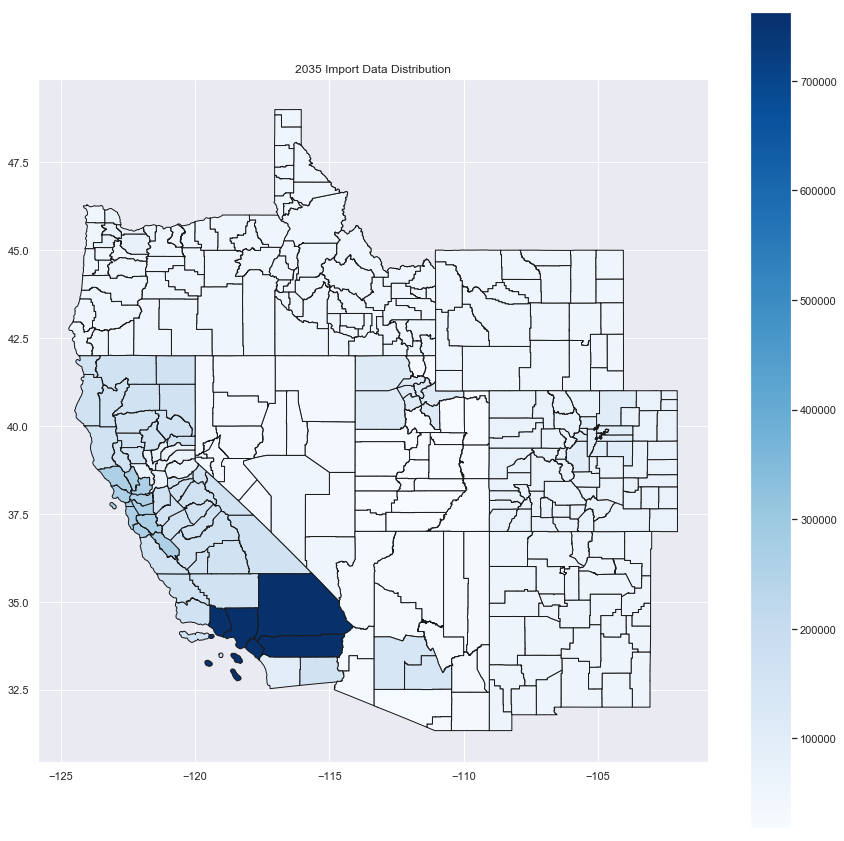

In [38]:
fig, ax = plt.subplots(figsize = (15,15))
# import data of 2035 is applied
df_import_merge.plot(ax = ax, edgecolor = 'k', column = 'value_2035', cmap = 'Blues', legend = True)
plt.title('2035 Import Data Distribution')

Text(0.5,1,'2035 Export Data Distribution')

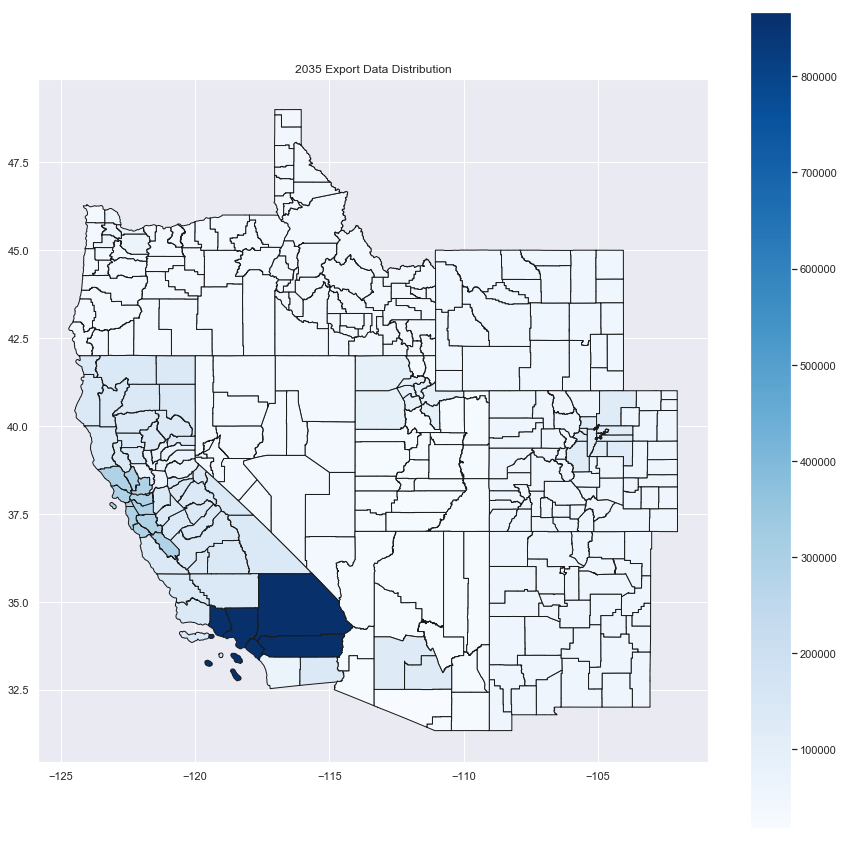

In [39]:
fig, ax = plt.subplots(figsize = (15,15))
# export data of 2035 is applied
df_export_merge.plot(ax = ax, edgecolor = 'k', column = 'value_2035', cmap = 'Blues', legend = True)
plt.title('2035 Export Data Distribution')

## Plotting histogram of the volume and value of total flows, broken down by mode

In [35]:
# Dividing data into different groups by mode
df_mode_group = df.groupby(df['dms_mode'])['tons_2012', 'tons_2013', 'tons_2014', 'tons_2015','tons_2020','tons_2025', 
                                          'tons_2030','tons_2035','tons_2040', 'tons_2045', 'value_2012', 'value_2013',
                                          'value_2014', 'value_2015', 'value_2020', 'value_2025', 'value_2030', 'value_2035',
                                          'value_2040'].sum()

D:\anzhuan\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [36]:

df_mode_group['total flow'] = df_mode_group.sum(axis = 1)
df_mode_group

,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,total flow
dms_mode,,,,,,,,,,,,,,,,,,,,
1,1.410449e+06,1.429211e+06,1.463523e+06,1.482164e+06,1.652972e+06,1.783830e+06,1.892784e+06,2.019057e+06,2.159501e+06,2.286636e+06,1.578956e+06,1.605998e+06,1.653559e+06,1.694368e+06,1.939032e+06,2.191077e+06,2.455292e+06,2.786936e+06,3.248654e+06,3.673400e+07
2,1.315467e+05,1.296865e+05,1.315751e+05,1.236798e+05,1.223710e+05,1.243290e+05,1.251175e+05,1.281894e+05,1.318484e+05,1.350215e+05,2.120526e+04,2.183453e+04,2.291063e+04,2.297701e+04,2.671358e+04,3.068955e+04,3.333752e+04,3.703266e+04,4.078093e+04,1.540846e+06
3,2.176178e+04,2.377522e+04,2.587311e+04,2.465938e+04,2.469391e+04,2.585059e+04,2.691917e+04,2.734687e+04,2.821129e+04,2.918678e+04,2.039794e+04,2.244078e+04,2.422762e+04,2.341343e+04,2.378238e+04,2.546651e+04,2.745294e+04,2.952883e+04,3.293945e+04,4.879280e+05
4,3.818240e+02,3.830160e+02,4.092802e+02,4.194513e+02,5.440971e+02,7.031608e+02,8.805130e+02,1.126189e+03,1.520323e+03,1.809394e+03,5.286711e+04,5.621052e+04,5.782136e+04,5.944954e+04,7.829958e+04,1.034637e+05,1.342046e+05,1.772990e+05,2.517631e+05,9.795557e+05
5,2.382639e+04,2.393607e+04,2.464176e+04,2.537228e+04,3.105015e+04,3.555235e+04,3.846879e+04,4.200603e+04,4.690919e+04,6.262178e+04,1.916440e+05,1.936927e+05,1.992240e+05,2.058009e+05,2.341459e+05,2.634875e+05,2.947993e+05,3.313948e+05,3.767237e+05,2.645298e+06
6,4.012159e+05,4.454939e+05,4.532998e+05,4.694725e+05,5.456311e+05,5.916100e+05,6.358496e+05,6.666160e+05,6.896957e+05,7.106538e+05,1.559022e+05,1.771392e+05,1.835195e+05,1.890160e+05,2.202539e+05,2.390548e+05,2.575835e+05,2.674611e+05,2.733166e+05,7.572785e+06
7,2.081443e+04,2.099886e+04,2.090021e+04,1.828665e+04,1.635363e+04,1.542217e+04,1.457820e+04,1.408943e+04,1.355194e+04,1.317399e+04,3.490689e+03,1.754873e+04,8.320884e+03,8.517766e+03,1.077554e+04,1.339239e+04,1.646102e+04,2.044462e+04,2.608368e+04,2.932048e+05
8,3.776789e+04,3.877749e+04,3.767379e+04,3.500933e+04,3.317696e+04,3.028217e+04,2.962531e+04,3.231381e+04,3.543194e+04,3.887508e+04,2.576769e+04,2.561371e+04,2.496463e+04,2.320860e+04,2.200969e+04,2.008973e+04,1.965960e+04,2.147480e+04,2.357496e+04,5.552972e+05


In [37]:
df_mode_group['dms_mode'] = df_mode_group.index

In [38]:
# reset the index of data and replace the previous one
df_mode_group = df_mode_group.reset_index(drop = True)

In [39]:
df_mode_group

,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,...,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,total flow,dms_mode
0,1.410449e+06,1.429211e+06,1.463523e+06,1.482164e+06,1.652972e+06,1.783830e+06,1.892784e+06,2.019057e+06,2.159501e+06,2.286636e+06,...,1.605998e+06,1.653559e+06,1.694368e+06,1.939032e+06,2.191077e+06,2.455292e+06,2.786936e+06,3.248654e+06,3.673400e+07,1
1,1.315467e+05,1.296865e+05,1.315751e+05,1.236798e+05,1.223710e+05,1.243290e+05,1.251175e+05,1.281894e+05,1.318484e+05,1.350215e+05,...,2.183453e+04,2.291063e+04,2.297701e+04,2.671358e+04,3.068955e+04,3.333752e+04,3.703266e+04,4.078093e+04,1.540846e+06,2
2,2.176178e+04,2.377522e+04,2.587311e+04,2.465938e+04,2.469391e+04,2.585059e+04,2.691917e+04,2.734687e+04,2.821129e+04,2.918678e+04,...,2.244078e+04,2.422762e+04,2.341343e+04,2.378238e+04,2.546651e+04,2.745294e+04,2.952883e+04,3.293945e+04,4.879280e+05,3
3,3.818240e+02,3.830160e+02,4.092802e+02,4.194513e+02,5.440971e+02,7.031608e+02,8.805130e+02,1.126189e+03,1.520323e+03,1.809394e+03,...,5.621052e+04,5.782136e+04,5.944954e+04,7.829958e+04,1.034637e+05,1.342046e+05,1.772990e+05,2.517631e+05,9.795557e+05,4
4,2.382639e+04,2.393607e+04,2.464176e+04,2.537228e+04,3.105015e+04,3.555235e+04,3.846879e+04,4.200603e+04,4.690919e+04,6.262178e+04,...,1.936927e+05,1.992240e+05,2.058009e+05,2.341459e+05,2.634875e+05,2.947993e+05,3.313948e+05,3.767237e+05,2.645298e+06,5
5,4.012159e+05,4.454939e+05,4.532998e+05,4.694725e+05,5.456311e+05,5.916100e+05,6.358496e+05,6.666160e+05,6.896957e+05,7.106538e+05,...,1.771392e+05,1.835195e+05,1.890160e+05,2.202539e+05,2.390548e+05,2.575835e+05,2.674611e+05,2.733166e+05,7.572785e+06,6
6,2.081443e+04,2.099886e+04,2.090021e+04,1.828665e+04,1.635363e+04,1.542217e+04,1.457820e+04,1.408943e+04,1.355194e+04,1.317399e+04,...,1.754873e+04,8.320884e+03,8.517766e+03,1.077554e+04,1.339239e+04,1.646102e+04,2.044462e+04,2.608368e+04,2.932048e+05,7
7,3.776789e+04,3.877749e+04,3.767379e+04,3.500933e+04,3.317696e+04,3.028217e+04,2.962531e+04,3.231381e+04,3.543194e+04,3.887508e+04,...,2.561371e+04,2.496463e+04,2.320860e+04,2.200969e+04,2.008973e+04,1.965960e+04,2.147480e+04,2.357496e+04,5.552972e+05,8


In [40]:
# take the column values
df_mode_group.iloc[:,0:10]

,tons_2012,tons_2013,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045
0,1.410449e+06,1.429211e+06,1.463523e+06,1.482164e+06,1.652972e+06,1.783830e+06,1.892784e+06,2.019057e+06,2.159501e+06,2.286636e+06
1,1.315467e+05,1.296865e+05,1.315751e+05,1.236798e+05,1.223710e+05,1.243290e+05,1.251175e+05,1.281894e+05,1.318484e+05,1.350215e+05
2,2.176178e+04,2.377522e+04,2.587311e+04,2.465938e+04,2.469391e+04,2.585059e+04,2.691917e+04,2.734687e+04,2.821129e+04,2.918678e+04
3,3.818240e+02,3.830160e+02,4.092802e+02,4.194513e+02,5.440971e+02,7.031608e+02,8.805130e+02,1.126189e+03,1.520323e+03,1.809394e+03
4,2.382639e+04,2.393607e+04,2.464176e+04,2.537228e+04,3.105015e+04,3.555235e+04,3.846879e+04,4.200603e+04,4.690919e+04,6.262178e+04
5,4.012159e+05,4.454939e+05,4.532998e+05,4.694725e+05,5.456311e+05,5.916100e+05,6.358496e+05,6.666160e+05,6.896957e+05,7.106538e+05
6,2.081443e+04,2.099886e+04,2.090021e+04,1.828665e+04,1.635363e+04,1.542217e+04,1.457820e+04,1.408943e+04,1.355194e+04,1.317399e+04
7,3.776789e+04,3.877749e+04,3.767379e+04,3.500933e+04,3.317696e+04,3.028217e+04,2.962531e+04,3.231381e+04,3.543194e+04,3.887508e+04


([array([0., 0., 0., 0., 0., 0., 4., 2., 2., 2.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([0., 3., 5., 2., 0., 0., 0., 0., 0., 0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([3.81824014e+02, 2.29007238e+05, 4.57632652e+05, 6.86258066e+05,
        9.14883480e+05, 1.14350889e+06, 1.37213431e+06, 1.60075972e+06,
        1.82938514e+06, 2.05801055e+06, 2.28663596e+06]),
 <a list of 8 Lists of Patches objects>)

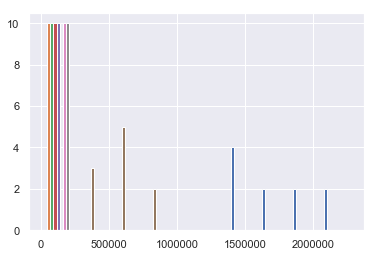

In [41]:
plt.hist(df_mode_group.iloc[:,:10])



In [42]:
df_mode_group.iloc[7,:10]

tons_2012    37767.8853
tons_2013    38777.4931
tons_2014    37673.7880
tons_2015    35009.3272
tons_2020    33176.9626
tons_2025    30282.1696
tons_2030    29625.3144
tons_2035    32313.8135
tons_2040    35431.9449
tons_2045    38875.0777
Name: 7, dtype: float64

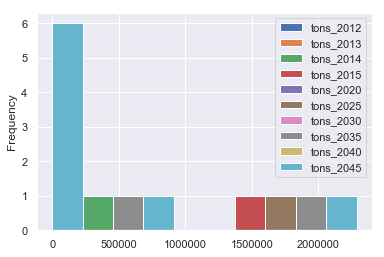

In [43]:
df_mode_group.iloc[:,:10].plot.hist()

## Plotting the Pie Chart

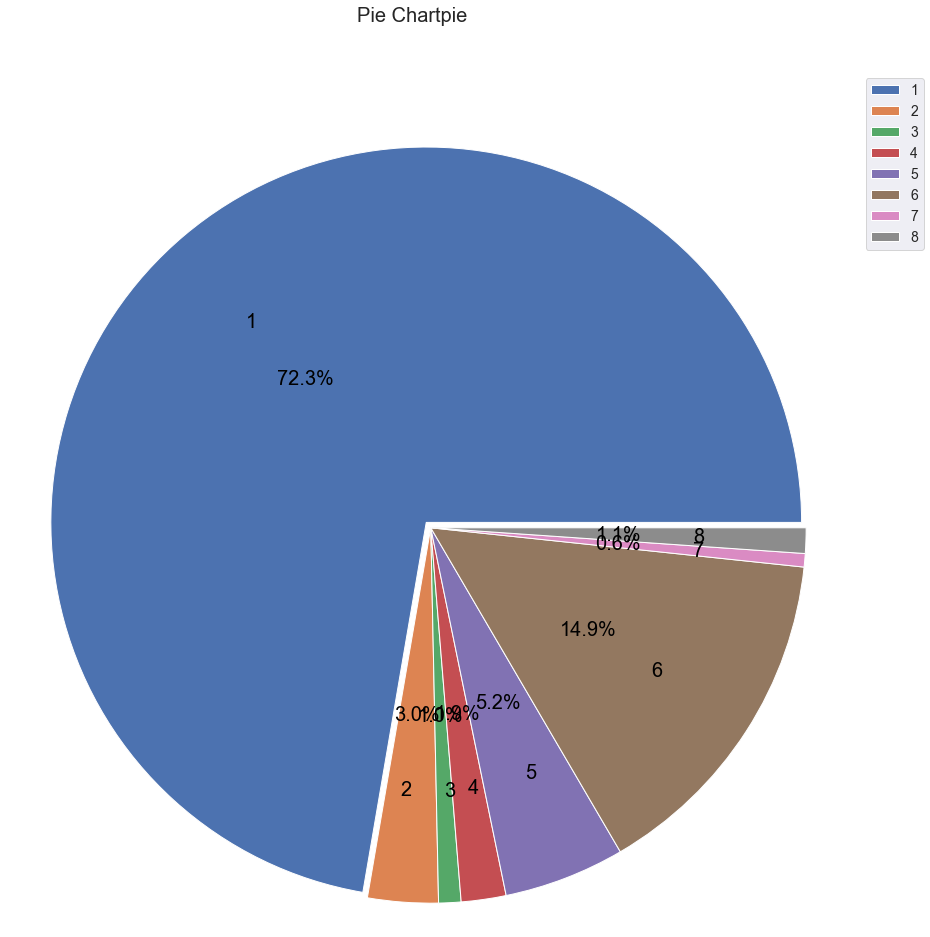

In [42]:
title = 'Pie Chart'
fig = plt.figure(title,figsize = (15,15))
fig.tight_layout()
ax = fig.add_subplot(111)
data = df_mode_group['total flow']
labels = ['1','2', '3', '4', '5','6', '7', '8']
explodes = [0 for x in data]
explodes[0] = 0.015
ax.pie(data, labels = labels, radius = 0.8,
      explode = explodes,
      autopct = '%1.1f%%',
      pctdistance = 0.5,
      labeldistance = 0.7,
      textprops = {'fontsize':20, 'color': 'black'})
plt.axis('equal')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.1, 1.05), fontsize = 14, borderaxespad = 0.3)
plt.suptitle(title+'pie', fontsize = 20)
plt.savefig('bingtu.png', dpi = 120, bbox_inches = 'tight')

## Rankings of cargo flows

In [43]:
# using sort
df_import_data_group_sort = df_import_data_group.sort_index()
top_5 = df_import_data_group_sort.iloc[:6,:]
bottom_5 = df_import_data_group_sort.iloc[-5:,:]

# Part 1.2

## Data Preperation

In [40]:
plot_size   = 14
plot_width  = 5
plot_height = 5

params = {'legend.fontsize': 'large',
          'figure.figsize': (plot_width,plot_height),
          'axes.labelsize': plot_size,
          'axes.titlesize': plot_size,
          'xtick.labelsize': plot_size*0.75,
          'ytick.labelsize': plot_size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

In [41]:
df_domestic_data_group = df_domestic_data.groupby(df['dms_dest'])[df_domestic_data.columns[6:25]].sum()
df_domestic_data_group


,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045
dms_dest,,,,,,,,,,,,,,,,,,
41,103032.666807,105821.111170,116787.567462,121070.492501,127257.427991,132673.635511,138345.690544,144984.890971,96479.844046,96903.222496,99580.121416,102527.589364,113328.886727,123077.259121,133098.193548,143253.420902,154411.670114,167732.960848
42,28716.498405,30643.959607,32796.222416,35929.861323,37130.160231,39962.246541,43386.443053,44085.626967,17668.983831,17887.219134,18287.020045,18818.025148,20924.404168,22662.269683,24369.574902,26053.448625,27833.076452,30050.451785
49,36372.183903,36228.388907,37246.733528,37612.096343,38149.001161,38868.358082,40015.006006,42306.673738,23135.287906,23669.572454,24206.938055,24691.500501,26729.860731,28669.939404,30690.962413,32712.808147,34946.108229,37746.018787
61,421012.164542,429961.660484,482588.066832,523060.768557,558902.404843,589803.448770,617903.825484,645946.934394,491920.681353,510555.538112,528734.690955,543779.488907,601397.676797,654916.196984,708711.772380,762456.523411,815657.052494,868677.095881
62,55041.143131,55766.359409,60006.709100,62686.190889,64398.505435,65679.061806,67386.283432,70531.703292,51515.268430,51348.295931,52167.618638,53165.566413,56770.329907,59840.915095,62883.564740,65989.464471,69614.283620,75057.574413
63,49734.236189,50270.106780,53007.932938,54554.929850,56163.376569,58020.794246,59805.914407,62582.196375,70407.810017,71540.941437,73430.107123,74862.562655,81305.668214,86752.070958,92072.398608,97694.872146,103691.499618,111862.604675
64,192152.462912,190601.142233,205003.190846,211518.904301,215921.352046,220726.950181,225044.936786,231380.395544,200794.529983,204639.956005,209031.953046,211038.724424,226864.355980,239455.958736,251515.167861,263962.695196,277759.756180,297214.440058
69,199549.970170,206524.691343,222375.232094,229534.902945,235029.631668,240386.917055,246523.553644,256698.343057,123623.239462,126643.821282,130228.732784,133633.970978,142958.466198,149541.159135,155748.514109,161509.382236,168135.224319,177943.411297
81,118715.607400,118180.455000,129682.228000,136341.576600,146625.308600,156749.743500,157734.738200,158945.931600,73707.976300,75788.945100,77946.263000,79099.411400,86583.979500,92410.225800,98546.163800,104429.432800,110665.235300,118406.270600


In [42]:
df_domestic_data_group.index

Int64Index([ 41,  42,  49,  61,  62,  63,  64,  69,  81,  89, 160, 321, 329,
            350, 411, 419, 491, 499, 560],
           dtype='int64', name='dms_dest')

In [43]:
df_domestic_data_group['dms_dest'] = df_domestic_data_group.index
df_domestic_data_group

,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_dest
dms_dest,,,,,,,,,,,,,,,,,,,
41,103032.666807,105821.111170,116787.567462,121070.492501,127257.427991,132673.635511,138345.690544,144984.890971,96479.844046,96903.222496,99580.121416,102527.589364,113328.886727,123077.259121,133098.193548,143253.420902,154411.670114,167732.960848,41
42,28716.498405,30643.959607,32796.222416,35929.861323,37130.160231,39962.246541,43386.443053,44085.626967,17668.983831,17887.219134,18287.020045,18818.025148,20924.404168,22662.269683,24369.574902,26053.448625,27833.076452,30050.451785,42
49,36372.183903,36228.388907,37246.733528,37612.096343,38149.001161,38868.358082,40015.006006,42306.673738,23135.287906,23669.572454,24206.938055,24691.500501,26729.860731,28669.939404,30690.962413,32712.808147,34946.108229,37746.018787,49
61,421012.164542,429961.660484,482588.066832,523060.768557,558902.404843,589803.448770,617903.825484,645946.934394,491920.681353,510555.538112,528734.690955,543779.488907,601397.676797,654916.196984,708711.772380,762456.523411,815657.052494,868677.095881,61
62,55041.143131,55766.359409,60006.709100,62686.190889,64398.505435,65679.061806,67386.283432,70531.703292,51515.268430,51348.295931,52167.618638,53165.566413,56770.329907,59840.915095,62883.564740,65989.464471,69614.283620,75057.574413,62
63,49734.236189,50270.106780,53007.932938,54554.929850,56163.376569,58020.794246,59805.914407,62582.196375,70407.810017,71540.941437,73430.107123,74862.562655,81305.668214,86752.070958,92072.398608,97694.872146,103691.499618,111862.604675,63
64,192152.462912,190601.142233,205003.190846,211518.904301,215921.352046,220726.950181,225044.936786,231380.395544,200794.529983,204639.956005,209031.953046,211038.724424,226864.355980,239455.958736,251515.167861,263962.695196,277759.756180,297214.440058,64
69,199549.970170,206524.691343,222375.232094,229534.902945,235029.631668,240386.917055,246523.553644,256698.343057,123623.239462,126643.821282,130228.732784,133633.970978,142958.466198,149541.159135,155748.514109,161509.382236,168135.224319,177943.411297,69
81,118715.607400,118180.455000,129682.228000,136341.576600,146625.308600,156749.743500,157734.738200,158945.931600,73707.976300,75788.945100,77946.263000,79099.411400,86583.979500,92410.225800,98546.163800,104429.432800,110665.235300,118406.270600,81


In [44]:
df_domestic_data_group.isnull().any().sum()
# no null value

0

In [45]:
df_domestic_data_group = df_domestic_data_group.reset_index(drop = True)

In [46]:
df_domestic_data_group 

,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_dest
0,103032.666807,105821.111170,116787.567462,121070.492501,127257.427991,132673.635511,138345.690544,144984.890971,96479.844046,96903.222496,99580.121416,102527.589364,113328.886727,123077.259121,133098.193548,143253.420902,154411.670114,167732.960848,41
1,28716.498405,30643.959607,32796.222416,35929.861323,37130.160231,39962.246541,43386.443053,44085.626967,17668.983831,17887.219134,18287.020045,18818.025148,20924.404168,22662.269683,24369.574902,26053.448625,27833.076452,30050.451785,42
2,36372.183903,36228.388907,37246.733528,37612.096343,38149.001161,38868.358082,40015.006006,42306.673738,23135.287906,23669.572454,24206.938055,24691.500501,26729.860731,28669.939404,30690.962413,32712.808147,34946.108229,37746.018787,49
3,421012.164542,429961.660484,482588.066832,523060.768557,558902.404843,589803.448770,617903.825484,645946.934394,491920.681353,510555.538112,528734.690955,543779.488907,601397.676797,654916.196984,708711.772380,762456.523411,815657.052494,868677.095881,61
4,55041.143131,55766.359409,60006.709100,62686.190889,64398.505435,65679.061806,67386.283432,70531.703292,51515.268430,51348.295931,52167.618638,53165.566413,56770.329907,59840.915095,62883.564740,65989.464471,69614.283620,75057.574413,62
5,49734.236189,50270.106780,53007.932938,54554.929850,56163.376569,58020.794246,59805.914407,62582.196375,70407.810017,71540.941437,73430.107123,74862.562655,81305.668214,86752.070958,92072.398608,97694.872146,103691.499618,111862.604675,63
6,192152.462912,190601.142233,205003.190846,211518.904301,215921.352046,220726.950181,225044.936786,231380.395544,200794.529983,204639.956005,209031.953046,211038.724424,226864.355980,239455.958736,251515.167861,263962.695196,277759.756180,297214.440058,64
7,199549.970170,206524.691343,222375.232094,229534.902945,235029.631668,240386.917055,246523.553644,256698.343057,123623.239462,126643.821282,130228.732784,133633.970978,142958.466198,149541.159135,155748.514109,161509.382236,168135.224319,177943.411297,69
8,118715.607400,118180.455000,129682.228000,136341.576600,146625.308600,156749.743500,157734.738200,158945.931600,73707.976300,75788.945100,77946.263000,79099.411400,86583.979500,92410.225800,98546.163800,104429.432800,110665.235300,118406.270600,81
9,134560.562101,133199.870501,137782.470901,141078.266201,142986.530301,145095.152701,147223.891402,151000.115001,54654.940407,57412.374407,58512.307007,59183.521207,63020.725709,65498.000209,68258.051210,70717.275910,73502.003810,77202.831410,89


In [47]:
df_domestic_data_group['dms_dest'] = df_domestic_data_group['dms_dest'].apply(lambda x:str(x).zfill(3))

In [48]:
df_domestic_data_group

,tons_2014,tons_2015,tons_2020,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,value_2012,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_dest
0,103032.666807,105821.111170,116787.567462,121070.492501,127257.427991,132673.635511,138345.690544,144984.890971,96479.844046,96903.222496,99580.121416,102527.589364,113328.886727,123077.259121,133098.193548,143253.420902,154411.670114,167732.960848,041
1,28716.498405,30643.959607,32796.222416,35929.861323,37130.160231,39962.246541,43386.443053,44085.626967,17668.983831,17887.219134,18287.020045,18818.025148,20924.404168,22662.269683,24369.574902,26053.448625,27833.076452,30050.451785,042
2,36372.183903,36228.388907,37246.733528,37612.096343,38149.001161,38868.358082,40015.006006,42306.673738,23135.287906,23669.572454,24206.938055,24691.500501,26729.860731,28669.939404,30690.962413,32712.808147,34946.108229,37746.018787,049
3,421012.164542,429961.660484,482588.066832,523060.768557,558902.404843,589803.448770,617903.825484,645946.934394,491920.681353,510555.538112,528734.690955,543779.488907,601397.676797,654916.196984,708711.772380,762456.523411,815657.052494,868677.095881,061
4,55041.143131,55766.359409,60006.709100,62686.190889,64398.505435,65679.061806,67386.283432,70531.703292,51515.268430,51348.295931,52167.618638,53165.566413,56770.329907,59840.915095,62883.564740,65989.464471,69614.283620,75057.574413,062
5,49734.236189,50270.106780,53007.932938,54554.929850,56163.376569,58020.794246,59805.914407,62582.196375,70407.810017,71540.941437,73430.107123,74862.562655,81305.668214,86752.070958,92072.398608,97694.872146,103691.499618,111862.604675,063
6,192152.462912,190601.142233,205003.190846,211518.904301,215921.352046,220726.950181,225044.936786,231380.395544,200794.529983,204639.956005,209031.953046,211038.724424,226864.355980,239455.958736,251515.167861,263962.695196,277759.756180,297214.440058,064
7,199549.970170,206524.691343,222375.232094,229534.902945,235029.631668,240386.917055,246523.553644,256698.343057,123623.239462,126643.821282,130228.732784,133633.970978,142958.466198,149541.159135,155748.514109,161509.382236,168135.224319,177943.411297,069
8,118715.607400,118180.455000,129682.228000,136341.576600,146625.308600,156749.743500,157734.738200,158945.931600,73707.976300,75788.945100,77946.263000,79099.411400,86583.979500,92410.225800,98546.163800,104429.432800,110665.235300,118406.270600,081
9,134560.562101,133199.870501,137782.470901,141078.266201,142986.530301,145095.152701,147223.891402,151000.115001,54654.940407,57412.374407,58512.307007,59183.521207,63020.725709,65498.000209,68258.051210,70717.275910,73502.003810,77202.831410,089


In [49]:
df_domestic_merge = pd.merge(df_map,df_domestic_data_group,left_on = 'CFS07DDGEO', right_on = 'dms_dest')
df_domestic_merge.shape

(319, 33)

In [50]:
df_domestic_merge['dms_dest']

0      350
1      350
2      350
3      350
4      350
      ... 
314    061
315    061
316    061
317    061
318    061
Name: dms_dest, Length: 319, dtype: object

In [51]:
df_domestic = df_domestic_merge.drop_duplicates(subset=['dms_dest'])


In [52]:
df_domestic

,ANSI_ST,ANSI_CNTY,ANSI_ST_CO,CNTY_NAME,CFS07_AREA,CFS12_AREA,CFS07_TYPE,CFS12_TYPE,CFS07DDGEO,CFS07GEOID,...,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_dest
0,35,007,35007,Colfax County,99999,99999,R,R,350,E330000US3599999999,...,46453.807700,47162.303600,47970.254100,50910.157500,53066.898900,55335.276700,57822.820300,60608.770400,63318.233300,350
33,41,007,41007,Clatsop County,99999,99999,R,R,419,E330000US4199999999,...,36704.944572,37566.099803,38215.834112,42233.930569,45301.834513,48701.394268,51984.599432,55537.096712,59467.389807,419
64,49,025,49025,Kane County,99999,99999,R,R,499,E330000US4999999999,...,13905.758100,14361.642400,14642.175600,15799.344600,16634.668600,17510.847700,18340.163800,19173.106700,20290.968200,499
85,16,057,16057,Latah County,99999,99999,R,R,160,E330000US1699999999,...,40719.798620,41621.764798,42754.982726,45977.467892,48484.556417,51311.612289,54120.685805,57305.709967,61453.296213,160
129,49,043,49043,Summit County,482,482,C,C,491,E330000US4948200000,...,81719.621108,84105.386831,85783.843036,93234.435779,99253.080424,105554.680464,111740.845603,118037.707039,124406.518679,491
137,41,067,41067,Washington County,38900,440,M,C,411,E330000US4199938900,...,55416.817427,55737.651487,56328.346116,61802.387546,65625.937455,69805.500978,73939.759470,78559.585903,84651.873537,411
142,56,029,56029,Park County,99999,99999,R,R,560,E330000US5699999999,...,39632.633200,39409.225900,40264.343800,44050.084500,46516.530300,49151.261100,51880.980900,54521.938600,56641.896200,560
165,08,053,08053,Hinsdale County,99999,99999,R,R,089,E330000US0899999999,...,57412.374407,58512.307007,59183.521207,63020.725709,65498.000209,68258.051210,70717.275910,73502.003810,77202.831410,089
217,08,047,08047,Gilpin County,216,216,C,C,081,E330000US0821600000,...,75788.945100,77946.263000,79099.411400,86583.979500,92410.225800,98546.163800,104429.432800,110665.235300,118406.270600,081
229,32,001,32001,Churchill County,99999,99999,R,R,329,E330000US3299999999,...,24860.821700,25417.675100,26026.952300,27827.634900,29385.874900,31069.496000,32901.245200,35075.318900,37824.513600,329


In [53]:

areas = list(df_domestic['dms_dest'])
rec_centroids = pd.DataFrame()

for area in areas:
    coords = df_domestic_merge[df_domestic_merge['dms_dest'] == area]['geometry'].reset_index(drop = True)
    gdf = coords.unary_union
    
    coords = pd.DataFrame({'area':[area], 'x_coord':[gdf.centroid.x], 'y_coord':[gdf.centroid.y]})
    rec_centroids = pd.concat([rec_centroids, coords]).reset_index(drop = True)
#df_domestic_merge = df_domestic_merge.drop_duplicates(subset = ['dms_dest'])
#df_domestic_merge.shape
rec_centroids  = rec_centroids.set_index('area')

## Determine the Centroid

In [54]:
rec_centroids.shape
#df_centroid = df_domestic_merge['geometry'].centroid

(19, 2)

In [55]:
df_domestic_merge.head()

,ANSI_ST,ANSI_CNTY,ANSI_ST_CO,CNTY_NAME,CFS07_AREA,CFS12_AREA,CFS07_TYPE,CFS12_TYPE,CFS07DDGEO,CFS07GEOID,...,value_2013,value_2014,value_2015,value_2020,value_2025,value_2030,value_2035,value_2040,value_2045,dms_dest
0,35,007,35007,Colfax County,99999,99999,R,R,350,E330000US3599999999,...,46453.8077,47162.3036,47970.2541,50910.1575,53066.8989,55335.2767,57822.8203,60608.7704,63318.2333,350
1,35,037,35037,Quay County,99999,99999,R,R,350,E330000US3599999999,...,46453.8077,47162.3036,47970.2541,50910.1575,53066.8989,55335.2767,57822.8203,60608.7704,63318.2333,350
2,35,059,35059,Union County,99999,99999,R,R,350,E330000US3599999999,...,46453.8077,47162.3036,47970.2541,50910.1575,53066.8989,55335.2767,57822.8203,60608.7704,63318.2333,350
3,35,035,35035,Otero County,99999,99999,R,R,350,E330000US3599999999,...,46453.8077,47162.3036,47970.2541,50910.1575,53066.8989,55335.2767,57822.8203,60608.7704,63318.2333,350
4,35,025,35025,Lea County,99999,99999,R,R,350,E330000US3599999999,...,46453.8077,47162.3036,47970.2541,50910.1575,53066.8989,55335.2767,57822.8203,60608.7704,63318.2333,350


In [56]:
x_coord = list(rec_centroids.x_coord)
y_coord = list(rec_centroids.y_coord)

In [57]:
coordinates = np.array(list(zip(x_coord, y_coord)))

In [58]:
coordinates

array([[-106.10837965,   34.42136216],
       [-120.5030564 ,   43.86844258],
       [-111.3831076 ,   38.82228206],
       [-114.65937639,   44.38907132],
       [-112.61890643,   40.92231858],
       [-122.69199014,   45.4102208 ],
       [-107.55145146,   42.99962659],
       [-105.6624939 ,   38.87857027],
       [-104.76574623,   39.81679182],
       [-116.84306325,   39.91808244],
       [-111.58739406,   34.68632067],
       [-120.40472835,   38.08404187],
       [-111.78994931,   32.09737902],
       [-112.07048785,   33.18570408],
       [-121.0546824 ,   38.91070599],
       [-122.11202669,   37.73685935],
       [-116.03160439,   37.49069861],
       [-116.77020543,   33.02820232],
       [-116.64643777,   34.46886206]])

## Determine the K-MEANS Cluster

In [59]:
model = KMeans(n_clusters = 11)

model.fit(coordinates)

clust_pred = model.predict(coordinates)

D:\anzhuan\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\anzhuan\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\anzhuan\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:53: Depr

In [60]:
centers = model.cluster_centers_

In [61]:
centers

array([[-112.00100702,   39.87230032],
       [-121.19047915,   38.24386907],
       [-111.81594374,   33.32313459],
       [-105.21412006,   39.34768104],
       [-122.69199014,   45.4102208 ],
       [-107.55145146,   42.99962659],
       [-116.7083216 ,   33.74853219],
       [-114.65937639,   44.38907132],
       [-106.10837965,   34.42136216],
       [-116.43733382,   38.70439053],
       [-120.5030564 ,   43.86844258]])

In [62]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(2,12),timings=False)
visualizer.fit(coordinates)   # Fit the data to the visualizer
visualizer.show()       # Finalize and render the figure

ModuleNotFoundError: No module named 'yellowbrick'

## Plotting of the cluster centroids on a map

In [63]:
#domestic = pd.DataFrame()
#domestic_data = df_map[df_map['trade_type'] == 1]
df_centers = gpd.GeoSeries(map(Point, centers))
df_centers

0     POINT (-112.00101 39.87230)
1     POINT (-121.19048 38.24387)
2     POINT (-111.81594 33.32313)
3     POINT (-105.21412 39.34768)
4     POINT (-122.69199 45.41022)
5     POINT (-107.55145 42.99963)
6     POINT (-116.70832 33.74853)
7     POINT (-114.65938 44.38907)
8     POINT (-106.10838 34.42136)
9     POINT (-116.43733 38.70439)
10    POINT (-120.50306 43.86844)
dtype: geometry

In [64]:
colors = plt.cm.Accent(clust_pred)

Text(0.5,1,'Map of centroids of 19 resions and 5 clusters')

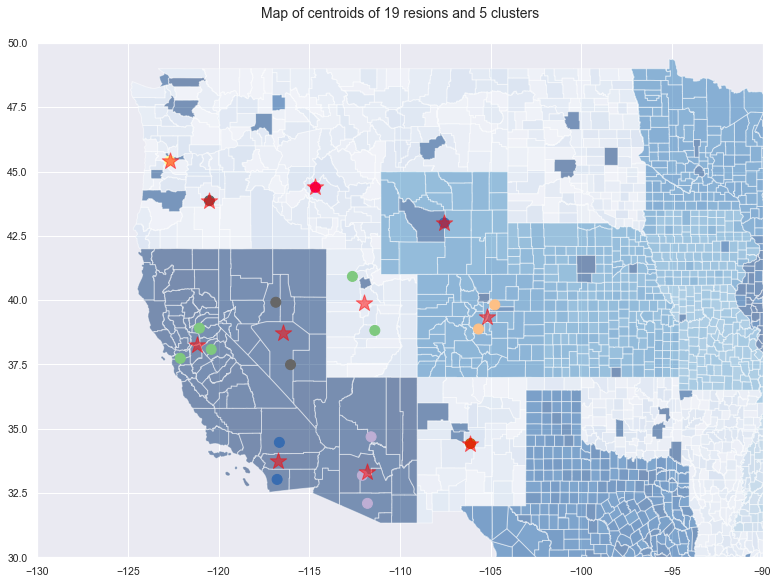

In [65]:
fig, ax = plt.subplots(figsize = (13,10))
#minx, miny, maxx, maxy = rec_centroids.total_bounds
ax.set_xlim(-130, -90)
ax.set_ylim(30, 50)
df_map.plot(ax = ax, alpha = 0.5, cmap = 'Blues')
plt.scatter(rec_centroids['x_coord'],rec_centroids['y_coord'],s=100,marker='o',c=clust_pred,cmap='Accent')
plt.scatter(centers[:,0],centers[:,1],color='red',s=300,marker = '*',alpha=0.5)
#rec_centroids.plot(ax = ax, markersize = 50, color = colors, marker = 'o')
#df_centers.plot(ax = ax, markersize = 300, color = 'red', marker = '*')
plt.title('Map of centroids of 19 resions and 5 clusters')


In [66]:
rec_centroids

,x_coord,y_coord
area,,
350,-106.108380,34.421362
419,-120.503056,43.868443
499,-111.383108,38.822282
160,-114.659376,44.389071
491,-112.618906,40.922319
411,-122.691990,45.410221
560,-107.551451,42.999627
089,-105.662494,38.878570
081,-104.765746,39.816792


# Part 2 – Facility Location Analysis

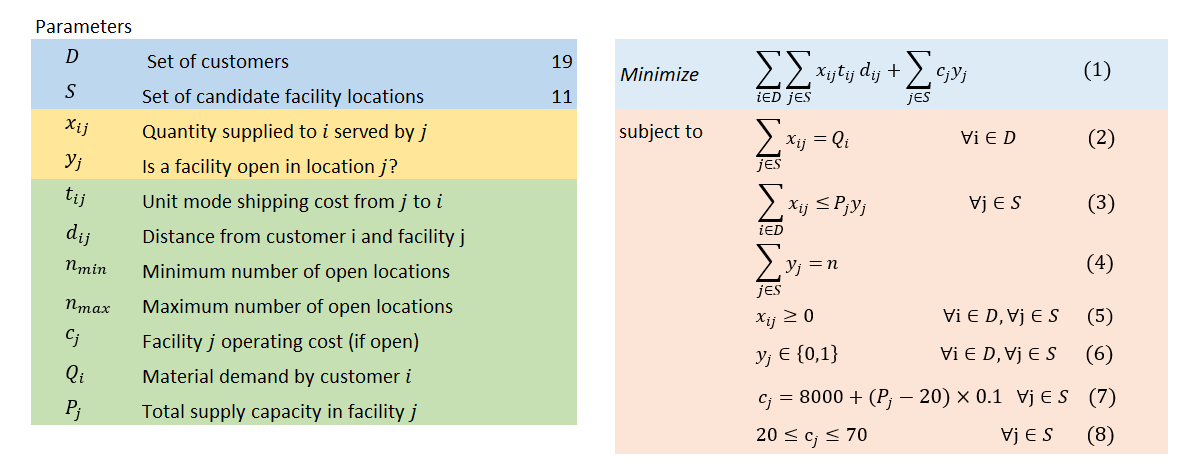

## customer coordinates


In [67]:
cust_coord = coordinates
cust_coord

array([[-106.10837965,   34.42136216],
       [-120.5030564 ,   43.86844258],
       [-111.3831076 ,   38.82228206],
       [-114.65937639,   44.38907132],
       [-112.61890643,   40.92231858],
       [-122.69199014,   45.4102208 ],
       [-107.55145146,   42.99962659],
       [-105.6624939 ,   38.87857027],
       [-104.76574623,   39.81679182],
       [-116.84306325,   39.91808244],
       [-111.58739406,   34.68632067],
       [-120.40472835,   38.08404187],
       [-111.78994931,   32.09737902],
       [-112.07048785,   33.18570408],
       [-121.0546824 ,   38.91070599],
       [-122.11202669,   37.73685935],
       [-116.03160439,   37.49069861],
       [-116.77020543,   33.02820232],
       [-116.64643777,   34.46886206]])

## 候选设施坐标

### 聚类生成11个待选设施点

In [68]:
model = KMeans(n_clusters = 11)

model.fit(coordinates)

clust_pred = model.predict(coordinates)
centers = model.cluster_centers_
facil_coord = centers
facil_coord

D:\anzhuan\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\anzhuan\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\anzhuan\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:53: Depr

array([[-121.19047915,   38.24386907],
       [-105.21412006,   39.34768104],
       [-111.81594374,   33.32313459],
       [-112.00100702,   39.87230032],
       [-107.55145146,   42.99962659],
       [-122.69199014,   45.4102208 ],
       [-116.43733382,   38.70439053],
       [-116.7083216 ,   33.74853219],
       [-114.65937639,   44.38907132],
       [-106.10837965,   34.42136216],
       [-120.5030564 ,   43.86844258]])

### 随机选择11个待选设施点

In [ ]:
#或者
np.random.seed(0)
facil_coord_idx= np.random.choice(range(len(rec_centroids)),11,replace=False)
                                   
facil_coord=[]
area_code=[]
for index in facil_coord_idx:
    slected_pt_coord=np.array(rec_centroids.iloc[index]).tolist()
    area_name=rec_centroids.iloc[index].name
    facil_coord.append(slected_pt_coord)
    area_code.append(area_name)
facil_coord=np.array(facil_coord)

facil_coord_idx



### 直接从19个质心中选择11个待选设施点

In [374]:
facil_coord=cust_coord

### 绘图

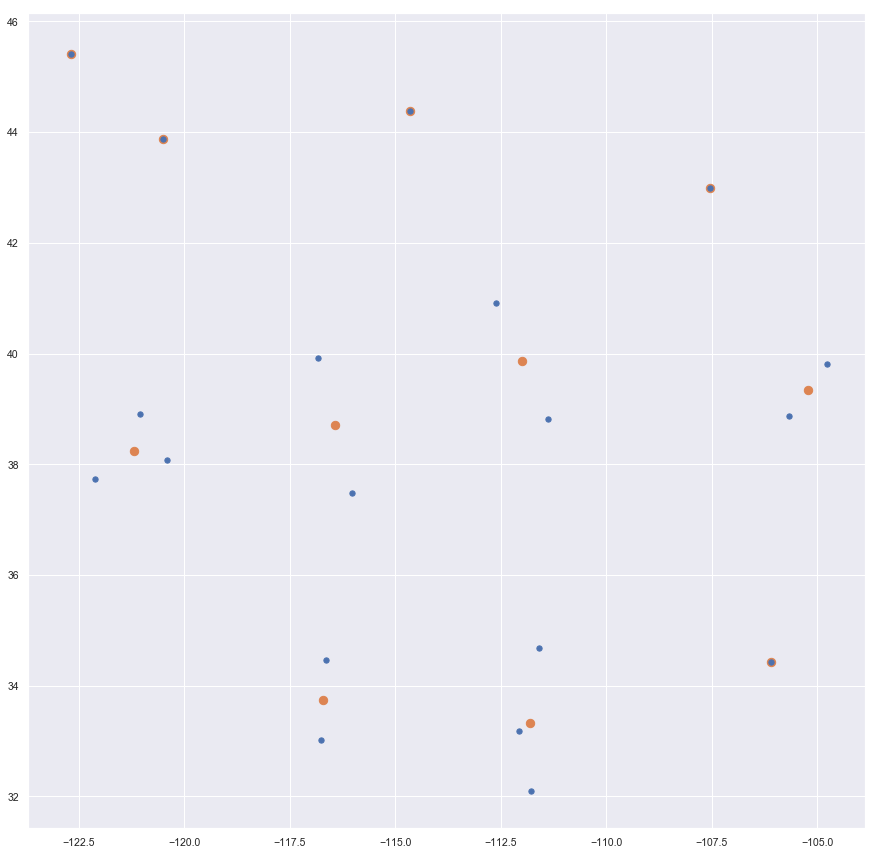

In [69]:
plt.figure(figsize=(15,15))
plt.scatter(cust_coord[:, 0], 
            cust_coord[:, 1], 
            s=plot_size*2, 
            cmap='viridis',
            zorder = 10000);


plt.scatter(facil_coord[:, 0], 
            facil_coord[:, 1], 
            s=plot_size*5, 
            cmap='viridis');

## 生成距离矩阵

In [70]:
from scipy.spatial import distance

dist_matrix = distance.cdist(cust_coord, facil_coord, 'euclidean').round(2)

#生成距离矩阵
df_dist_matrix = pd.DataFrame(dist_matrix)
#
#df_dist_matrix.columns = ['350', '419', '499', '160', '491', '411', '560', '089', '081', '329','049', '069', '042', '041', '062', '064', '321', '063', '061']
df_dist_matrix.index=rec_centroids.index
df_dist_matrix

,0,1,2,3,4,5,6,7,8,9,10
area,,,,,,,,,,,
350,15.56,5.01,5.81,8.03,8.70,19.89,11.18,10.62,13.13,0.00,17.22
419,5.67,15.94,13.66,9.39,12.98,2.68,6.57,10.81,5.87,17.22,0.00
499,9.82,6.19,5.52,1.22,5.67,13.09,5.06,7.36,6.46,6.87,10.42
160,8.97,10.71,11.43,5.24,7.24,8.10,5.96,10.84,0.00,13.13,5.87
491,8.98,7.57,7.64,1.22,5.48,11.03,4.42,8.26,4.02,9.20,8.42
411,7.32,18.50,16.26,12.04,15.33,0.00,9.17,13.11,8.10,19.89,2.68
560,14.44,4.34,10.57,5.44,0.00,15.33,9.87,13.02,7.24,8.70,12.98
089,15.54,0.65,8.29,6.42,4.53,18.24,10.78,12.18,10.55,4.48,15.66
081,16.50,0.65,9.59,7.24,4.23,18.78,11.72,13.40,10.90,5.56,16.25


## customer_demands

In [71]:
#Load csv file 
df = pd.read_csv('orders_regions.csv')
df.head()
df.columns

#提取2020年物流数据
df_tons_2020 = df.iloc[:,[1,2,4,5,10]]
df_tons_2020['dms_dest'] = df_tons_2020['dms_dest'].apply(lambda x:str(x).zfill(3))
df_tons_2020['dms_orig'] = df_tons_2020['dms_orig'].apply(lambda x:str(x).zfill(3))
df_dms_2020 = df_tons_2020[(df_tons_2020['trade_type'] == 1)]
df_dms_2020


D:\anzhuan\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anzhuan\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,dms_orig,dms_dest,dms_mode,trade_type,tons_2020
0,041,041,1,1,8.7784
1,041,042,1,1,11.2387
2,041,061,1,1,121.2010
3,041,069,1,1,38.4003
4,042,041,1,1,4.8117
...,...,...,...,...,...
64038,560,419,5,1,0.1204
64039,560,491,1,1,59.0027
64040,560,499,1,1,0.4743
64041,560,560,1,1,136.1143


In [72]:
del_index=df_dms_2020[(df_dms_2020['dms_orig'] == df_dms_2020['dms_dest'])].index
df_dms_2020.drop(index=list(del_index),inplace=True, axis=0)

custm_demands = df_dms_2020.groupby(by=['dms_orig'])['tons_2020'].sum()
custm_demands= np.array(custm_demands)
df_dms_2020

D:\anzhuan\Anaconda\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dms_orig,dms_dest,dms_mode,trade_type,tons_2020
1,041,042,1,1,11.2387
2,041,061,1,1,121.2010
3,041,069,1,1,38.4003
4,042,041,1,1,4.8117
6,042,069,1,1,42.7068
...,...,...,...,...,...
64036,560,411,5,1,0.1305
64037,560,419,1,1,0.4009
64038,560,419,5,1,0.1204
64039,560,491,1,1,59.0027


In [73]:
custm_demands.sum()

683502.6252513295

## mode_cost_matrix

In [74]:
transp_unit_cost = [1,0.6,1.5,2.5,1.5,1.5,1.5,1.5]

mode_matrix=pd.DataFrame(np.full((19,19),0))
mode_matrix=pd.DataFrame(np.full((19,19),0))
mode_matrix.columns=df_dist_matrix.columns
mode_matrix.index=df_dist_matrix.index


for i in range(0,len(df_dms_2020)): #df列索引从1开始
    orig = df_dms_2020.iloc[i,0]
    dest = df_dms_2020.iloc[i,1]
    mode = df_dms_2020.iloc[i,2]

    #列是orig 行是 dest
    if mode_matrix[orig][dest]==0:
        mode_matrix[orig][dest] = mode #若原位置为0，则把值赋给对应位置
    
    #若已经有值且不为0，比较大小，将费用低模式赋给对应位置
    else: 
        if transp_unit_cost[mode-1] <= transp_unit_cost[mode_matrix[orig][dest]-1]:
            mode_matrix[orig][dest] = mode
        else:
            mode_matrix[orig][dest] = mode_matrix[orig][dest]
mode_matrix

ValueError: Length mismatch: Expected axis has 19 elements, new values have 11 elements

In [473]:
mode_cost_matrix = mode_matrix.applymap(lambda x:transp_unit_cost[x-1] if x>0 else 0)
mode_cost_matrix

,350,419,499,160,491,411,560,089,081,329,049,069,042,041,062,064,321,063,061
area,,,,,,,,,,,,,,,,,,,
350,0.0,1.0,1.0,0.6,1.0,0.6,0.6,0.6,1.0,0.6,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0
419,1.0,0.0,1.0,0.6,1.0,0.6,1.0,1.0,1.0,1.0,1.0,0.6,1.0,1.0,1.0,0.6,1.0,1,1.0
499,1.0,1.0,0.0,1.0,0.6,1.0,1.0,0.6,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0
160,1.0,0.6,1.0,0.0,0.6,0.6,0.6,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,0.6,1,0.6
491,1.0,0.6,0.6,0.6,0.0,0.6,0.6,0.6,0.6,0.6,1.0,0.6,1.0,1.0,0.6,0.6,1.0,1,0.6
411,1.0,0.6,1.0,0.6,0.6,0.0,0.6,0.6,1.0,1.0,1.0,0.6,0.6,1.0,1.0,0.6,1.0,1,0.6
560,1.0,1.0,1.0,1.0,0.6,1.0,0.0,0.6,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0
089,1.0,1.0,0.6,0.6,0.6,0.6,0.6,0.0,0.6,1.0,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1,0.6
081,1.0,0.6,1.0,0.6,0.6,0.6,0.6,0.6,0.0,1.0,1.0,0.6,1.0,1.0,1.0,0.6,1.0,1,0.6


In [475]:
mode_cost_matrix = np.array(mode_cost_matrix)

(19, 19)

## Pulp solve the problem

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

%matplotlib inline

plot_size   = 30
plot_width  = 19
plot_height = 17

params = {'legend.fontsize': 'large',
          'figure.figsize': (plot_width,plot_height),
          'axes.labelsize': plot_size,
          'axes.titlesize': plot_size,
          'xtick.labelsize': plot_size*0.75,
          'ytick.labelsize': plot_size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

In [150]:
n_customer = len(rec_centroids)
n_facility = 11

facil_establi_cost = 8000*np.ones((1,n_facility), dtype=int)
facil_establi_cost = facil_establi_cost.tolist()[0]
capacity_unit_cost = 0.1*np.ones((1,n_facility), dtype=int)#per tonne
capacity_unit_cost = capacity_unit_cost.tolist()[0]
facil_establi_capacity = 200000*np.ones((1,n_facility), dtype=int)
facil_establi_capacity = facil_establi_capacity.tolist()[0]

n_min = 1
n_max = n_facility

budget = 50000

#facil_coord
#custm_coord
#dist_matrix
#custm_demands
#mode_cost_matrix

In [151]:
from pulp import *
from scipy.spatial import distance

prob = LpProblem('prob', LpMinimize)

In [152]:
# Define sets of customers and facilities
S = [('S'+str(i+1)) for i in range(n_facility)]
D = [('C'+str(i+1)) for i in range(n_customer)]

# Populate cost, demand and capacity arrays
#P = {facility:(facil_establi_capacity[j]+e[j]) for j,facility in enumerate(S)}
Ce = {facility:(facil_establi_cost[j]) for j,facility in enumerate(S)}
Cu = {facility:(capacity_unit_cost[j]) for j,facility in enumerate(S)}
Q = {customer:(custm_demands[i]) for i,customer in enumerate(D)}

trc_matrix = dist_matrix * min(transp_unit_cost)#19个点的话用mode_cost_matrix
t = {customer:{facility:(trc_matrix[i][j]) for j,facility in enumerate(S)} for i,customer in enumerate(D)}

In [153]:
pd.DataFrame(t)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19
S1,9.336,3.402,5.892,5.382,5.388,4.392,8.664,9.324,9.900,2.796,6.144,0.480,6.738,6.258,0.408,0.630,3.126,4.104,3.546
S2,3.006,9.564,3.714,6.426,4.542,11.100,2.604,0.390,0.390,6.984,4.740,9.144,5.874,5.532,9.510,10.182,6.588,7.902,7.458
S3,3.486,8.196,3.312,6.858,4.584,9.756,6.342,4.974,5.754,4.974,0.828,5.892,0.738,0.174,6.480,6.720,3.558,2.976,2.976
S4,4.818,5.634,0.732,3.144,0.732,7.224,3.264,3.852,4.344,2.904,3.120,5.154,4.668,4.014,5.460,6.198,2.808,5.004,4.278
S5,5.220,7.788,3.402,4.344,3.288,9.198,0.000,2.718,2.538,5.874,5.544,8.256,7.020,6.480,8.466,9.288,6.066,8.148,7.482
S6,11.934,1.608,7.854,4.860,6.618,0.000,9.198,10.944,11.268,4.812,9.264,4.602,10.326,9.714,4.020,4.620,6.210,8.238,7.500
S7,6.708,3.942,3.036,3.576,2.652,5.502,5.922,6.468,7.032,0.768,3.780,2.412,4.848,4.224,2.772,3.456,0.768,3.414,2.544
S8,6.372,6.486,4.416,6.504,4.956,7.866,7.812,7.308,8.040,3.702,3.126,3.420,3.114,2.802,4.050,4.032,2.280,0.432,0.432
S9,7.878,3.522,3.876,0.000,2.412,4.860,4.344,6.330,6.540,2.988,6.108,5.118,7.572,6.900,5.052,5.994,4.218,6.936,6.072
S10,0.000,10.332,4.122,7.878,5.520,11.934,5.220,2.688,3.336,7.236,3.294,8.856,3.684,3.654,9.366,9.804,6.234,6.450,6.324


In [154]:
# Define decision variables
x = LpVariable.dicts('x', (D,S), lowBound = 0, cat = LpContinuous)
y = LpVariable.dicts('y', S, lowBound = 0, upBound = 1, cat = LpInteger)
p = LpVariable.dicts('p', S, lowBound = 200000, upBound = 700000, cat = LpContinuous)
z = LpVariable.dicts('z', S, lowBound = 0, cat = LpContinuous)
# 目标函数
prob += lpSum([lpSum([x[i][j]*t[i][j] for j in S]) for i in D])+lpSum([z[j]*100000 for j in S])-lpSum([y[j]*12000000000 for j in S])

In [155]:
# Constraint 1: 所有区域货物要运出去
for i in D:
    prob += lpSum([x[i][j] for j in S]) == Q[i]

# Constraint 2: The logical constraint - facilities supply material only if they are open
# Constraint 2: 运到处理中心货物量不超过其容量
for j in S:
    prob += lpSum([x[i][j] for i in D]) <= z[j] 
    prob += z[j] <= 700000*y[j]
    prob += z[j] >= 200000*y[j]
    prob += z[j] <= p[j]+200000*y[j]-200000
    prob += z[j] >= p[j]+700000*y[j]-700000

# Constraint 3: 总成本低于预算
for j in S:
    prob += lpSum([z[j] for j in S])-lpSum(120000*[y[j] for j in S]) <= 500000

# Constraint 4: Define the minimum and maximum number of facilities
# Constraint 4: 开设处理中心数量不超过11个，不少于1个
prob += lpSum([y[j] for j in S]) >= n_min
prob += lpSum([y[j] for j in S]) <= n_max


In [156]:
status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')


STATUS
Optimal



In [157]:
##查看各变量最优结果及目标函数值
print("Status:", LpStatus[prob.status]) # 输出求解状态
for v in prob.variables():
    print(v.name, "=", v.varValue)  # 输出每个变量的最优值
print("F(x) = ", pulp.value(prob.objective))  #输出最优解的目标函数值


Status: Optimal
p_S1 = 200000.0
p_S10 = 200000.0
p_S11 = 200000.0
p_S2 = 200000.0
p_S3 = 200000.0
p_S4 = 200000.0
p_S5 = 200000.0
p_S6 = 200000.0
p_S7 = 200000.0
p_S8 = 200000.0
p_S9 = 200000.0
x_C10_S1 = 0.0
x_C10_S10 = 0.0
x_C10_S11 = 0.0
x_C10_S2 = 0.0
x_C10_S3 = 0.0
x_C10_S4 = 0.0
x_C10_S5 = 0.0
x_C10_S6 = 0.0
x_C10_S7 = 62258.042
x_C10_S8 = 0.0
x_C10_S9 = 0.0
x_C11_S1 = 0.0
x_C11_S10 = 0.0
x_C11_S11 = 0.0
x_C11_S2 = 0.0
x_C11_S3 = 0.0
x_C11_S4 = 0.0
x_C11_S5 = 0.0
x_C11_S6 = 0.0
x_C11_S7 = 0.0
x_C11_S8 = 10556.218
x_C11_S9 = 0.0
x_C12_S1 = 0.0
x_C12_S10 = 0.0
x_C12_S11 = 0.0
x_C12_S2 = 0.0
x_C12_S3 = 0.0
x_C12_S4 = 0.0
x_C12_S5 = 0.0
x_C12_S6 = 0.0
x_C12_S7 = 33574.658
x_C12_S8 = 0.0
x_C12_S9 = 0.0
x_C13_S1 = 0.0
x_C13_S10 = 0.0
x_C13_S11 = 0.0
x_C13_S2 = 0.0
x_C13_S3 = 0.0
x_C13_S4 = 0.0
x_C13_S5 = 0.0
x_C13_S6 = 0.0
x_C13_S7 = 0.0
x_C13_S8 = 5473.2472
x_C13_S9 = 0.0
x_C14_S1 = 0.0
x_C14_S10 = 0.0
x_C14_S11 = 0.0
x_C14_S2 = 0.0
x_C14_S3 = 0.0
x_C14_S4 = 0.0
x_C14_S5 = 0.0
x_C14_S

In [158]:
chosen_facil = []
for j,facility in enumerate(S):
    if y[facility].varValue == 1:
        chosen_facil.append(j)
        print(f'We will be establishing a facility in {facility}')
        
chosen_facil

We will be establishing a facility in S2
We will be establishing a facility in S7
We will be establishing a facility in S8
We will be establishing a facility in S9


[1, 6, 7, 8]

200000.0

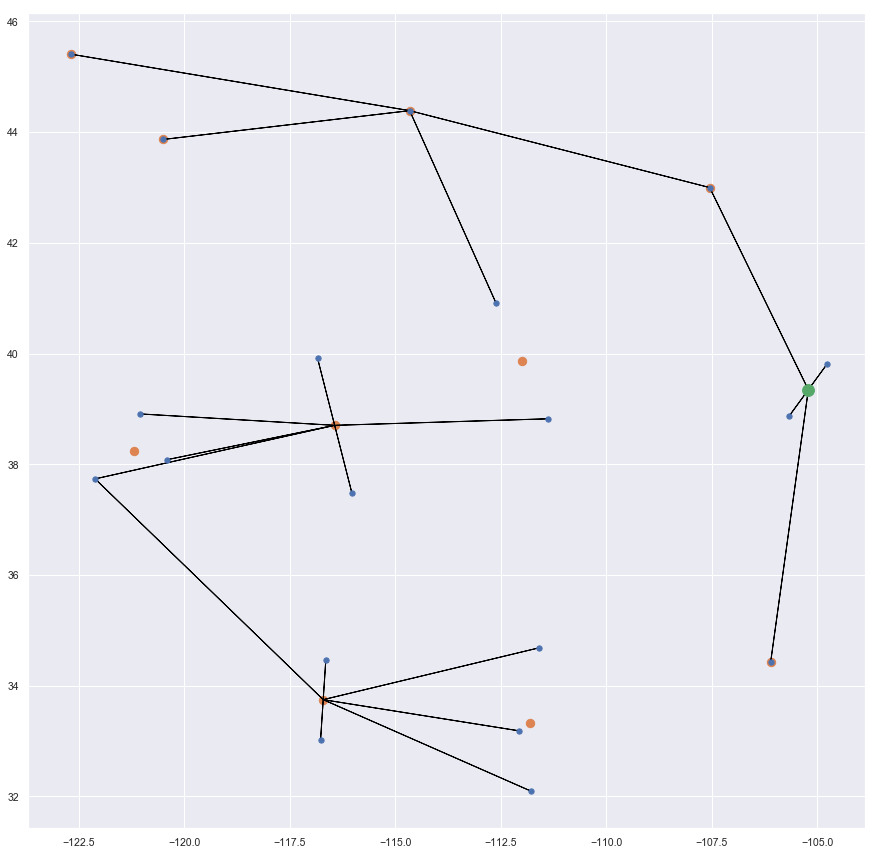

In [147]:
vect_orig = []
vect_dest = []
u = v = np.zeros((len(vect_orig),len(vect_orig)))

for j,facility in enumerate(S):
    for i,customer in enumerate(D):
        if x[customer][facility].varValue > 0:
            vect_orig.append(facil_coord[j])
            vect_dest.append(cust_coord[i])
            
vect_orig = np.array(vect_orig)
vect_dest = np.array(vect_dest)

plt.figure(figsize=(15,15))
plt.scatter(cust_coord[:, 0], 
            cust_coord[:, 1], 
            s=plot_size*2, 
            cmap='viridis',
            zorder = 10000);


plt.scatter(facil_coord[:, 0], 
            facil_coord[:, 1], 
            s=plot_size*5, 
            cmap='viridis');

for i in range(len(vect_orig)):
    plt.arrow(vect_orig[i][0],
              vect_orig[i][1],
              vect_dest[i][0]-vect_orig[i][0],
              vect_dest[i][1]-vect_orig[i][1],
              color='black')
    
plt.scatter(facil_coord[chosen_facil, 0], 
            facil_coord[chosen_facil, 1], 
            s=plot_size*10, 
            cmap='viridis',
            zorder=99999)

{'S1': p_S1,
 'S2': p_S2,
 'S3': p_S3,
 'S4': p_S4,
 'S5': p_S5,
 'S6': p_S6,
 'S7': p_S7,
 'S8': p_S8,
 'S9': p_S9,
 'S10': p_S10,
 'S11': p_S11}

# 2030年capacity 
已知Gigacluster位置和capacity

In [118]:
#提取2030年物流数据
df_tons_2030 = df.iloc[:,[1,2,4,5,12]]
df_tons_2030['dms_dest'] = df_tons_2030['dms_dest'].apply(lambda x:str(x).zfill(3))
df_tons_2030['dms_orig'] = df_tons_2030['dms_orig'].apply(lambda x:str(x).zfill(3))
df_dms_2030 = df_tons_2030[(df_tons_2030['trade_type'] == 1)]

del_index=df_dms_2030[(df_dms_2030['dms_orig'] == df_dms_2030['dms_dest'])].index
df_dms_2030.drop(index=list(del_index),inplace=True, axis=0)

custm_demands = df_dms_2030.groupby(by=['dms_orig'])['tons_2030'].sum()
custm_demands= np.array(custm_demands)
df_dms_2030

D:\anzhuan\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anzhuan\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anzhuan\Anaconda\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

,dms_orig,dms_dest,dms_mode,trade_type,tons_2030
1,041,042,1,1,13.2975
2,041,061,1,1,142.7123
3,041,069,1,1,37.7589
4,042,041,1,1,4.9409
6,042,069,1,1,44.1864
...,...,...,...,...,...
64036,560,411,5,1,0.1526
64037,560,419,1,1,0.4688
64038,560,419,5,1,0.1408
64039,560,491,1,1,68.9952


In [119]:
custm_demands.sum()

757137.6287821897